# 第6章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して、以下の処理を行うプログラムを作成せよ。

## 50. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ、300次元）をダウンロードし、”United States”の単語ベクトルを表示せよ。ただし、”United States”は内部的には”United_States”と表現されていることに注意せよ。

In [2]:
!gunzip GoogleNews-vectors-negative300.bin.gz

gzip: GoogleNews-vectors-negative300.bin.gz: No such file or directory


In [3]:
from gensim.models import KeyedVectors

model_path = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

vector = model['United_States']
print(f'length of vector: {len(vector)}')
print(vector)

length of vector: 300
[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7

## 51. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ。

In [4]:
vector_1 = model['United_States']
vector_2 = model['U.S.']

similarity = model.similarity('United_States', 'U.S.')
print(similarity)


0.73107743


## 52. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と、その類似度を出力せよ。

In [5]:
similar_words = model.most_similar('United_States', topn=10)

for word, similarity in similar_words:
    print(f'word: {word}\tsimilarity: {similarity}')

word: Unites_States	similarity: 0.7877248525619507
word: Untied_States	similarity: 0.7541370987892151
word: United_Sates	similarity: 0.7400724291801453
word: U.S.	similarity: 0.7310774326324463
word: theUnited_States	similarity: 0.6404393911361694
word: America	similarity: 0.6178410053253174
word: UnitedStates	similarity: 0.6167312264442444
word: Europe	similarity: 0.6132988929748535
word: countries	similarity: 0.6044804453849792
word: Canada	similarity: 0.601906955242157


## 53. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き、”Athens”のベクトルを足したベクトルを計算し、そのベクトルと類似度の高い10語とその類似度を出力せよ。

In [6]:
result = model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

for word, similarity in result:
    print(f'word: {word}\tsimilarity: {similarity}')

word: Greece	similarity: 0.6898480653762817
word: Aristeidis_Grigoriadis	similarity: 0.560684859752655
word: Ioannis_Drymonakos	similarity: 0.5552908778190613
word: Greeks	similarity: 0.545068621635437
word: Ioannis_Christou	similarity: 0.5400862097740173
word: Hrysopiyi_Devetzi	similarity: 0.5248445272445679
word: Heraklio	similarity: 0.5207759737968445
word: Athens_Greece	similarity: 0.516880989074707
word: Lithuania	similarity: 0.5166865587234497
word: Iraklion	similarity: 0.5146791338920593


## 54. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし、国と首都に関する事例（: capital-common-countriesセクション）に対して、vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し、そのベクトルと類似度が最も高い単語と、その類似度を求めよ。求めた単語と類似度は、各事例と一緒に記録せよ。

In [7]:
quintuple = []
ground_truths = []
preds = []

with open('単語アナロジーの評価データ.txt', 'r') as f:
    for line in f:
        line = line.strip()
        # Find the current title and skip it
        if line.startswith(':'):
            current_title = line
            continue
        # If the current title is not `capital-common-countries`, skip the current seciton
        if current_title != ': capital-common-countries':
            continue

        word1, word2, word3, ground_truth = line.split()

        # Only process operation on words included in model's dictionary
        if all(word in model.key_to_index for word in [word1, word2, word3]):
            ground_truths.append(ground_truth)
            pred, pred_similarity = model.most_similar(positive=[word2, word3], negative=[word1], topn=1)[0]
            preds.append(pred)
            quintuple.append([word1, word2, word3, pred, pred_similarity])

# Output the result
for e in quintuple:
    print(f'word1: {e[0]}, word2: {e[1]}, word3: {e[2]}, top1_word: {e[3]}, top1_similarity: {e[4]}')


word1: Athens, word2: Greece, word3: Baghdad, top1_word: Iraqi, top1_similarity: 0.635187029838562
word1: Athens, word2: Greece, word3: Bangkok, top1_word: Thailand, top1_similarity: 0.7137669324874878
word1: Athens, word2: Greece, word3: Beijing, top1_word: China, top1_similarity: 0.7235778570175171
word1: Athens, word2: Greece, word3: Berlin, top1_word: Germany, top1_similarity: 0.6734622716903687
word1: Athens, word2: Greece, word3: Bern, top1_word: Switzerland, top1_similarity: 0.4919748306274414
word1: Athens, word2: Greece, word3: Cairo, top1_word: Egypt, top1_similarity: 0.7527808547019958
word1: Athens, word2: Greece, word3: Canberra, top1_word: Australia, top1_similarity: 0.583732545375824
word1: Athens, word2: Greece, word3: Hanoi, top1_word: Viet_Nam, top1_similarity: 0.6276341676712036
word1: Athens, word2: Greece, word3: Havana, top1_word: Cuba, top1_similarity: 0.6460990905761719
word1: Athens, word2: Greece, word3: Helsinki, top1_word: Finland, top1_similarity: 0.6899984

## 55. アナロジータスクでの正解率
54の実行結果を用い、意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ。

In [23]:
import numpy as np
from tqdm.notebook import tqdm

# Prepare 2 title sets to select different sections from the article
semantic_titles, syntactic_titles = set(), set()
with open('単語アナロジーの評価データ.txt', 'r') as f:
    for line in f:
        if not line.startswith(':'):
            continue
        title = line[2:].strip()
        if title.startswith('gram'):
            syntactic_titles.add(title.strip())
        else:
            semantic_titles.add(title.strip())

# Prepare lists to store predictions and ground truths of semantic sections and syntactic sections
semantic_preds, semantic_gts = [], []
syntactic_preds, syntactic_gts = [], []

with open('単語アナロジーの評価データ.txt', 'r') as f:
    current_title = None
    lines = f.readlines()
    for line in tqdm(lines):
        line = line.strip()
        if line.startswith(':'):
            current_title = line[2:].strip()
            continue

        word1, word2, word3, ground_truth = line.split()
        if not {word1, word2, word3}.issubset(model.key_to_index):
            continue

        pred, _ = model.most_similar(
            positive=[word2, word3],
            negative=[word1],
            topn=1
        )[0]

        if current_title in semantic_titles:
            semantic_gts.append(ground_truth)
            semantic_preds.append(pred)
        elif current_title in syntactic_titles:
            syntactic_gts.append(ground_truth)
            syntactic_preds.append(pred)


def get_accuracy(preds, ground_truths):
    preds = np.asarray(preds)
    ground_truths = np.asarray(ground_truths)
    return (preds == ground_truths).mean()

print(f'semantic_accuracy: {get_accuracy(semantic_preds, semantic_gts)}')
print(f'syntactic_accuracy: {get_accuracy(syntactic_preds, syntactic_gts)}')
print(f"semantic samples  : {len(semantic_gts)}")
print(f"syntactic samples : {len(syntactic_gts)}")

  0%|          | 0/19558 [00:00<?, ?it/s]

semantic_accuracy: 0.7308602999210734
syntactic_accuracy: 0.7400468384074942
semantic samples  : 8869
syntactic samples : 10675


## 56. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし、単語ベクトルにより計算される類似度のランキングと、人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ。

In [14]:
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
from scipy.stats import spearmanr

# Read the data and convert it to a ndarray
df = pd.read_csv('wordsim353/combined.csv')
lines = df.to_numpy()

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

gts, preds = [], []
for line in lines:
    if word1 in model and word2 in model:
        word1, word2, gt = line[0], line[1], line[2]
        preds.append(model.similarity(word1, word2))
        gts.append(gt)

corr = spearmanr(gts, preds).statistic
print(f"Spearman's rank correlation coefficient: {corr:.4f}")


Spearman's rank correlation coefficient: 0.7000


## 57. k-meansクラスタリング
国名に関する単語ベクトルを抽出し、k-meansクラスタリングをクラスタ数k=5として実行せよ。

In [32]:
import pycountry
import numpy as np
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans

# Load model
model_path = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

# Obtain contries, and replace space with underline because country names containing more than 2 words stored in `model` are connected with underline
country_names = [country.name.replace(' ', '_') for country in pycountry.countries]

# Select country names included in model
countries, vecs = [], []
for country in country_names:
    if country in model:
        countries.append(country)
        vecs.append(model[country])

X = np.asarray(vecs)

# K-Means
n_clusters = 5
km = KMeans(n_clusters=n_clusters)
labels = km.fit_predict(X)

clusters = {i: [] for i in range(n_clusters)}
for country, lable in zip(words, labels):
    clusters[lable].append(country)

for label, country_cluster in clusters.items():
    print(f'cluster {label+1}')
    print(f'number of countries: {len(country_cluster)}')
    print(', '.join(country_cluster), '\n')


cluster 1
number of countries: 43
Angola, Burundi, Benin, Burkina_Faso, Botswana, Cameroon, Congo, Comoros, Djibouti, Algeria, Egypt, Eritrea, Western_Sahara, Ethiopia, Gabon, Ghana, Guinea, Gambia, Equatorial_Guinea, Kenya, Liberia, Libya, Lesotho, Madagascar, Mali, Myanmar, Mozambique, Mauritania, Malawi, Namibia, Niger, Nigeria, Rwanda, Sudan, Senegal, Sierra_Leone, Somalia, Togo, Tunisia, Uganda, Yemen, Zambia, Zimbabwe 

cluster 2
number of countries: 39
Albania, Andorra, Armenia, Austria, Azerbaijan, Bulgaria, Belarus, Switzerland, Cyprus, Czechia, Germany, Estonia, Finland, Faroe_Islands, Greece, Croatia, Hungary, Iceland, Italy, Kazakhstan, Kyrgyzstan, Liechtenstein, Lithuania, Latvia, Malta, Montenegro, Poland, Portugal, Romania, San_Marino, Serbia, Slovakia, Slovenia, Sweden, Tajikistan, Turkmenistan, Türkiye, Ukraine, Uzbekistan 

cluster 3
number of countries: 56
Afghanistan, Åland_Islands, United_Arab_Emirates, Antarctica, Australia, Belgium, Bangladesh, Bahrain, Saint_Bar

## 58. Ward法によるクラスタリング
国名に関する単語ベクトルに対し、Ward法による階層型クラスタリングを実行せよ。さらに、クラスタリング結果をデンドログラムとして可視化せよ。

In [ ]:
import pycountry
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Load model
model_path = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

# Obtain contries, and replace space with underline because country names containing more than 2 words stored in `model` are connected with underline
country_names = [country.name.replace(' ', '_') for country in pycountry.countries]

# Select country names included in model
countries, vecs = [], []
for country in country_names:
    if country in model:
        countries.append(country)
        vecs.append(model[country])

X = np.asarray(vecs)

# Use `ward` method
Z = linkage(vecs, method='ward')

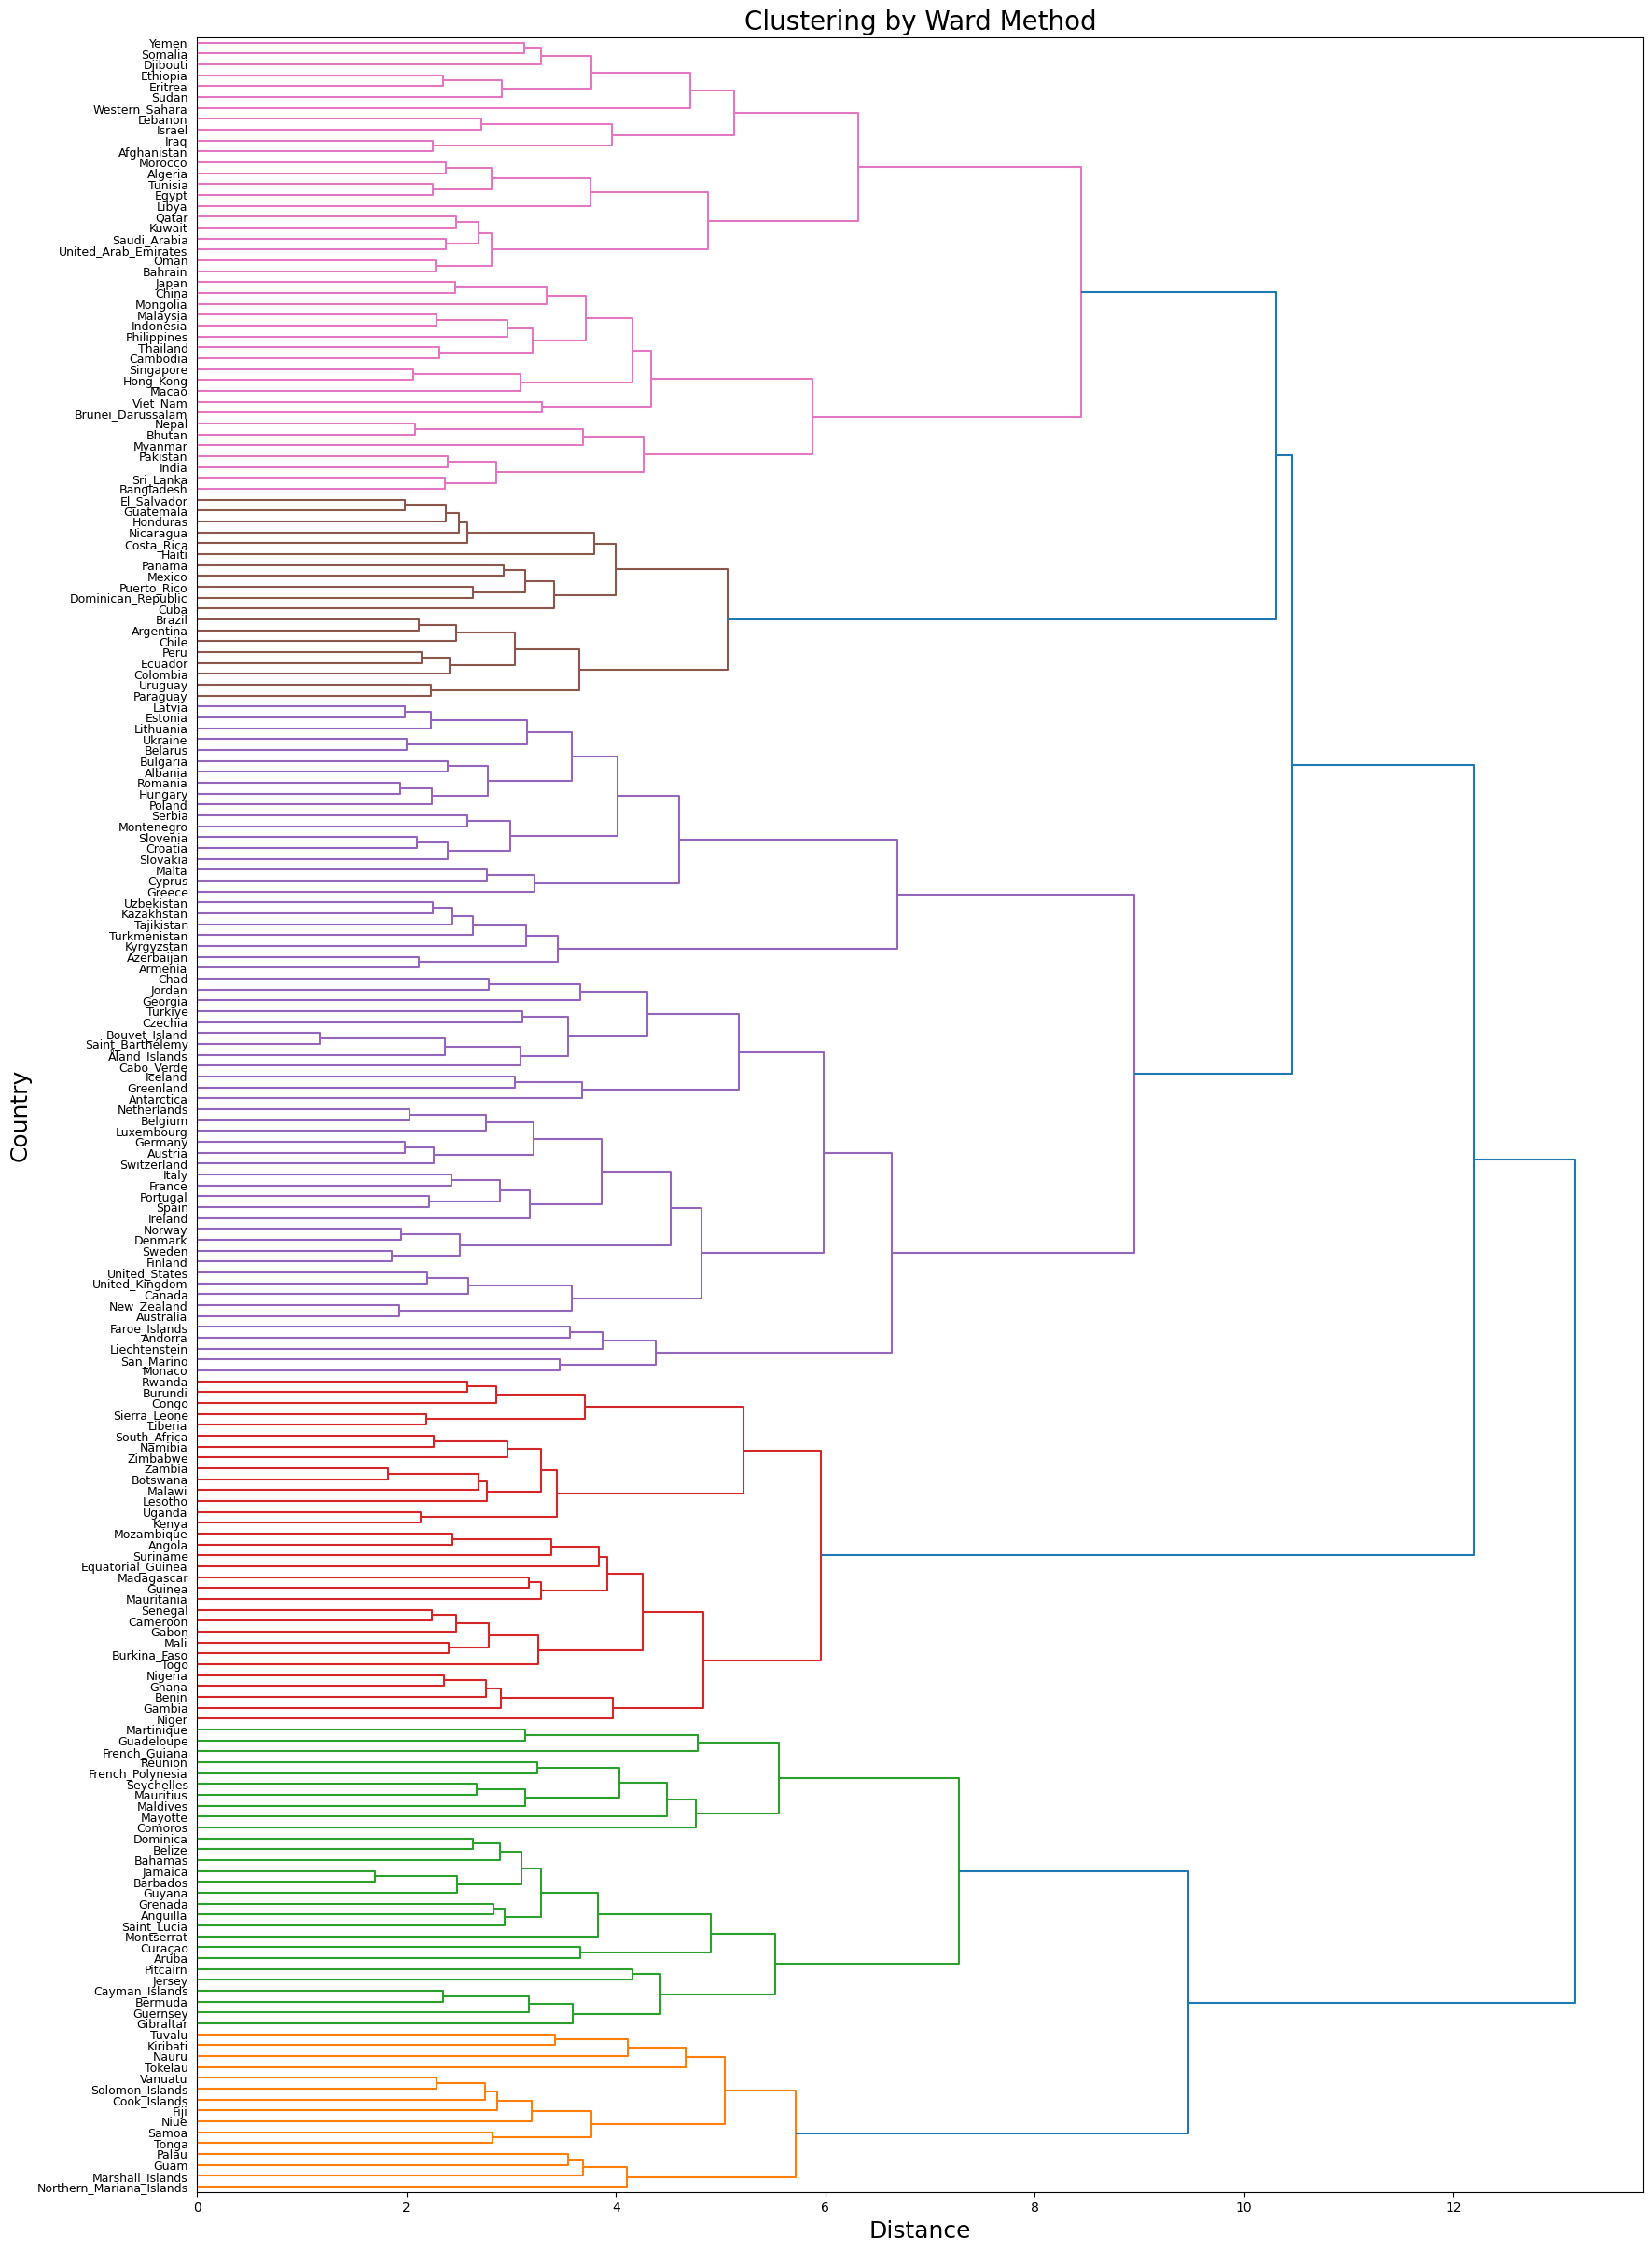

In [68]:
# Plot
plt.figure(figsize=(20, 30))
dendrogram(
    Z,
    labels=countries,
    orientation='right', 
    leaf_font_size=9  # size of leaf label
)
plt.title('Clustering by Ward Method', fontsize=20)
plt.ylabel('Country', fontsize=18)
plt.xlabel('Distance', fontsize=18)
plt.show()

## 59. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ。

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components=2)

# Run t-SNE
X_tsne = tsne.fit_transform(X)  # shape: (N, 2)


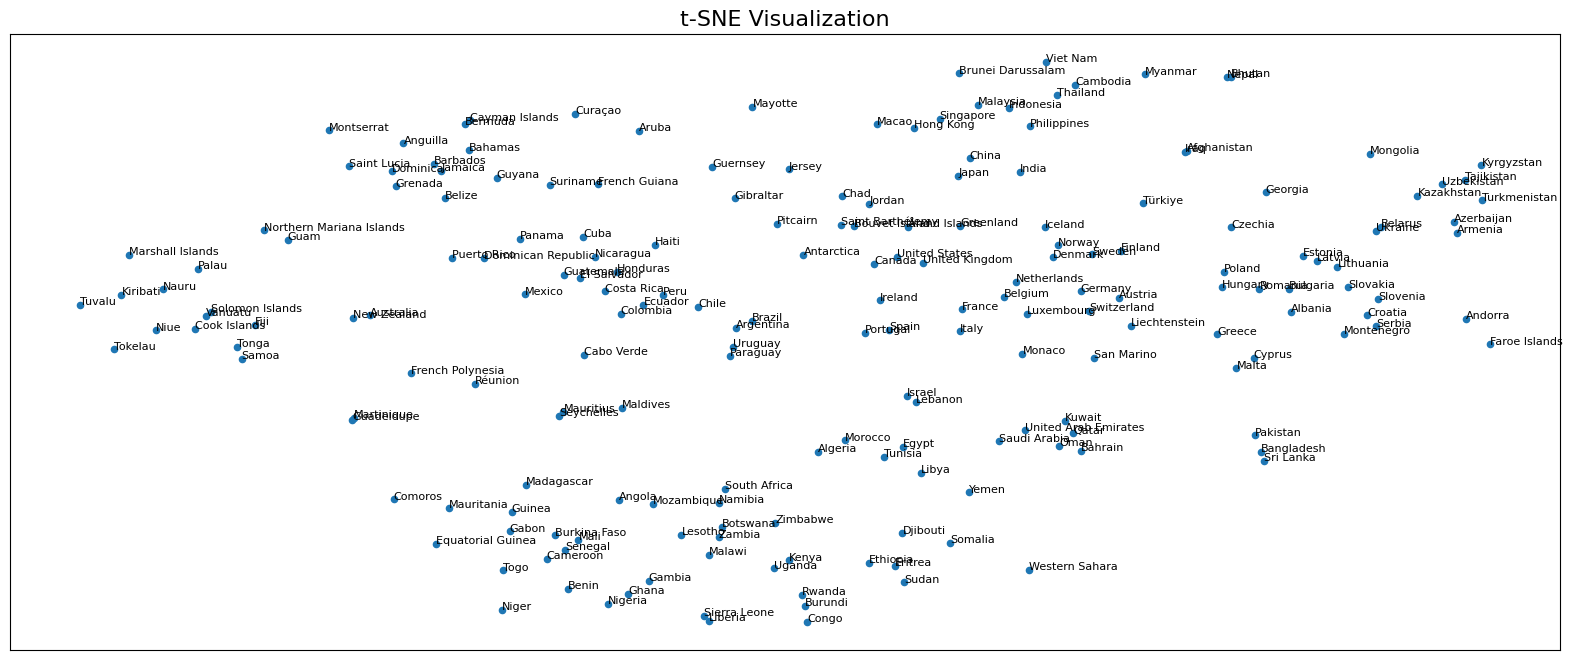

In [62]:
# Plot
plt.figure(figsize=(20, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=20)

# Label each point with its corresponding country name
for i, name in enumerate(countries):
    plt.text(
        X_tsne[i, 0], X_tsne[i, 1], name.replace('_', ' '),
        fontsize=8,
    )

plt.title('t-SNE Visualization', fontsize=16)
plt.xticks([], [])
plt.yticks([], [])
plt.show()